### 6.1 Sourcing Open Data
This Script includes the following points

- Import Libraries
1. Uploading & Checking the data
2. Initial Data Exploration
3. Handling missing values
4. Checking for Duplicates, mixed type data and performing data transformations
5. Preprocessing the Data
6. Analysing & Visualising Data
7. Checking the outliers
8. Exporting the dataset

### -Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1. Uploading & Checking the data

In [2]:
# Tell Python to remember a main folder path
path = r'/Users/gideon/Desktop/King County_USA_House sales'

In [3]:
path

'/Users/gideon/Desktop/King County_USA_House sales'

In [4]:
# Upload the dataset of Housesales_in_USA as df_housesales
df_housesales = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Housesales_in_USA.csv'))

In [5]:
df_housesales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df_housesales.shape

(21613, 21)

### 2. Initial Data Exploration

In [7]:
df_housesales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df_housesales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df_housesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Converting Datetime
Looking at the date column immediately it is classified as an object data type. We can convert it to a datetime data type by running the code block below.

In [10]:
df_housesales['date'] = pd.to_datetime(df_housesales['date'])
df_housesales.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### 3. Handling Missing Values

#### Let's check for the missing values in our dataset

In [11]:
df_housesales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### It appears our dataset has all the data complete

### 4. Checking for Duplicates, mixed type data and performing data transformations

In [12]:
# varify if there are any duplicated values in the dataset
Duplicates_df_housesales = df_housesales.duplicated()
# display the sum of count in False and True
Duplicates_df_housesales.value_counts()

False    21613
Name: count, dtype: int64

In [13]:
Duplicates_df_housesales

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [14]:
df_housesales[df_housesales.duplicated]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


#### It appears our dataset has no duplicates(because all the dtypes displayed are 'false', which means no duplicates. If there are any 'true' dtypes displayed, then there would be duplicates)

### 5. Preprocessing the Data

#### Statistical summary in distribution by describe() method
describe() method: display statistical summary of numerical variables

describe(include=['object']) method: display brief summary of categorical variables such as sum of count, frequency, top, and unique

In [15]:
# Statistical distribution of numerical data
df_housesales.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312049
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


#### Data Wrangling
This process includes data transformation & converting data from raw data format or structure into another format for analysis. It is a crucial step to shape raw data into usable forms to gain valuable insights.

In [16]:
# Change data types of 'bathroom' and 'floor'using astype()
df_housesales['bathrooms'] = df_housesales['bathrooms'].astype("int64")
df_housesales['floors'] = df_housesales['floors'].astype("int64")

In [17]:
# Drop 'id', 'date' columns that do not affect on house sales price
df_housesales.drop(['id', 'date'], axis=1, inplace=True) 
# 'axis=1' indicates column, 
# 'inplace=True' indicates that we modify the dataframe itself instead of creating new one

In [18]:
# Unique values and frequency of each variable in a column
unique_value_df = df_housesales[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
for column in unique_value_df.columns.values.tolist():
    print(unique_value_df[column].value_counts(), '\n') 

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64 

bathrooms
2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: count, dtype: int64 

floors
1    12590
2     8402
3      621
Name: count, dtype: int64 

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64 

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64 



### 6. Analysing & Visualising Data
Visualizing data is a critical step for delivering hidden patterns, trends, and insights in a way that is easy to understand. It supports discovering outliers and explaining the subsequent storytelling after visualizing data.

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'grade'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'condition'}>]], dtype=object)

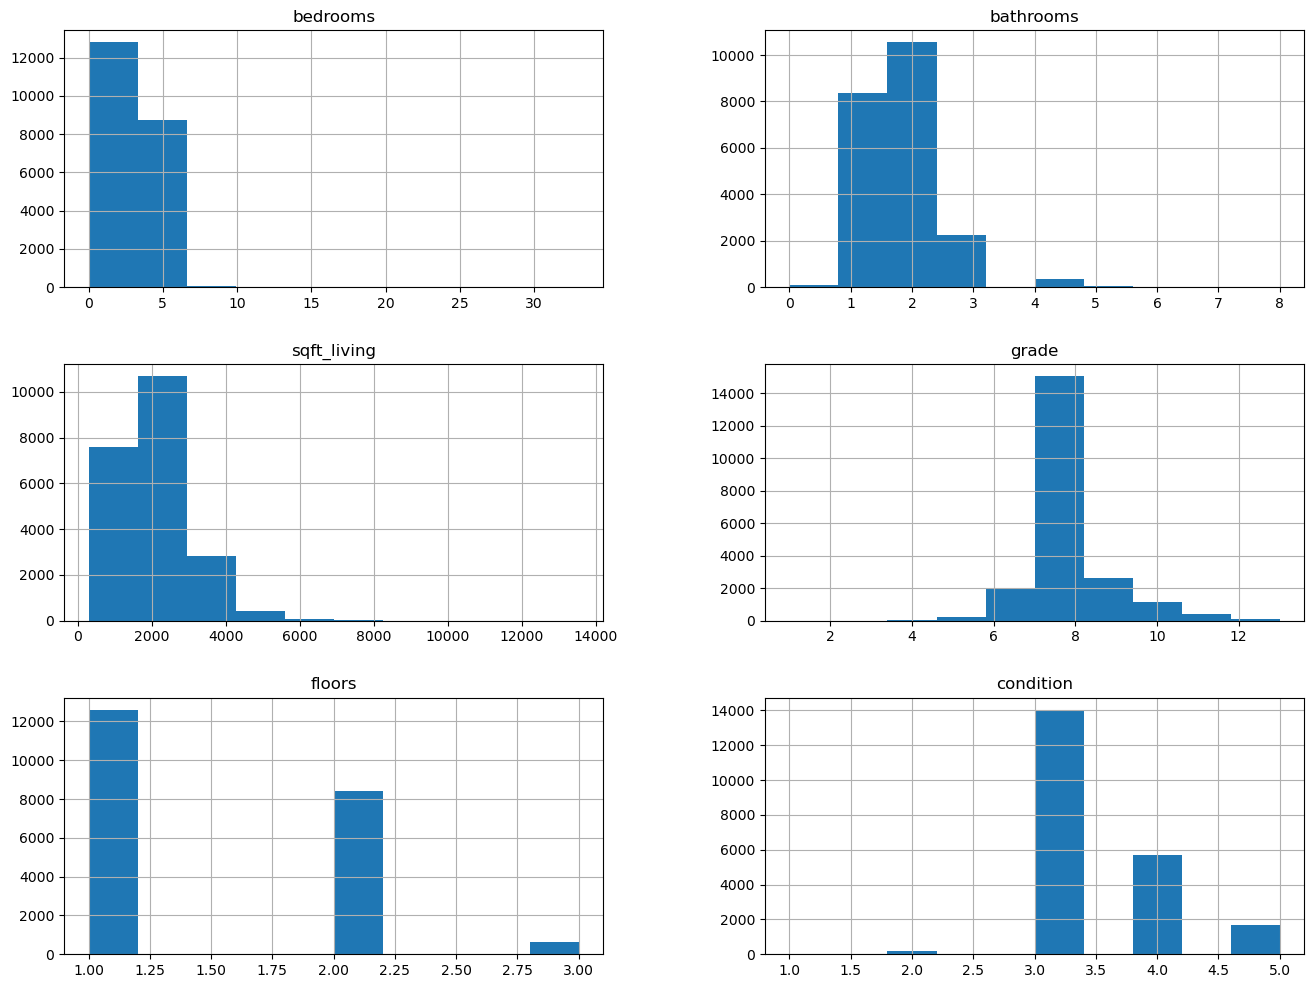

In [19]:
# Data distribution
hist_df = df_housesales[['bedrooms', 'bathrooms', 'sqft_living','grade', 'floors', 'condition']]
hist_df.hist(figsize=(16, 12))

/var/folders/d9/m6pz848x453dch7l819567br0000gn/T/ipykernel_36311/1978180337.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_housesales['price'], hist=True, kde=True,


<Axes: xlabel='price', ylabel='Density'>

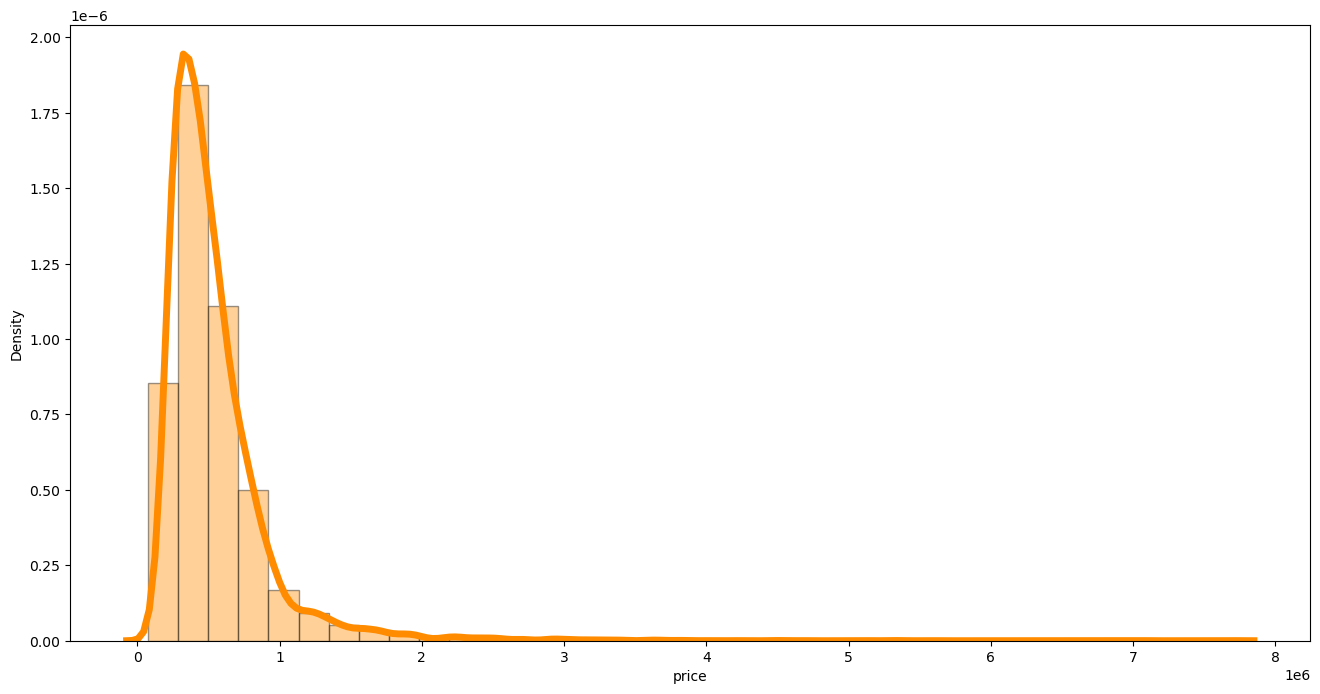

In [20]:
# Distribution of house sales price by densitiy 
plt.figure(figsize=(16,8))
sns.distplot(df_housesales['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 5})

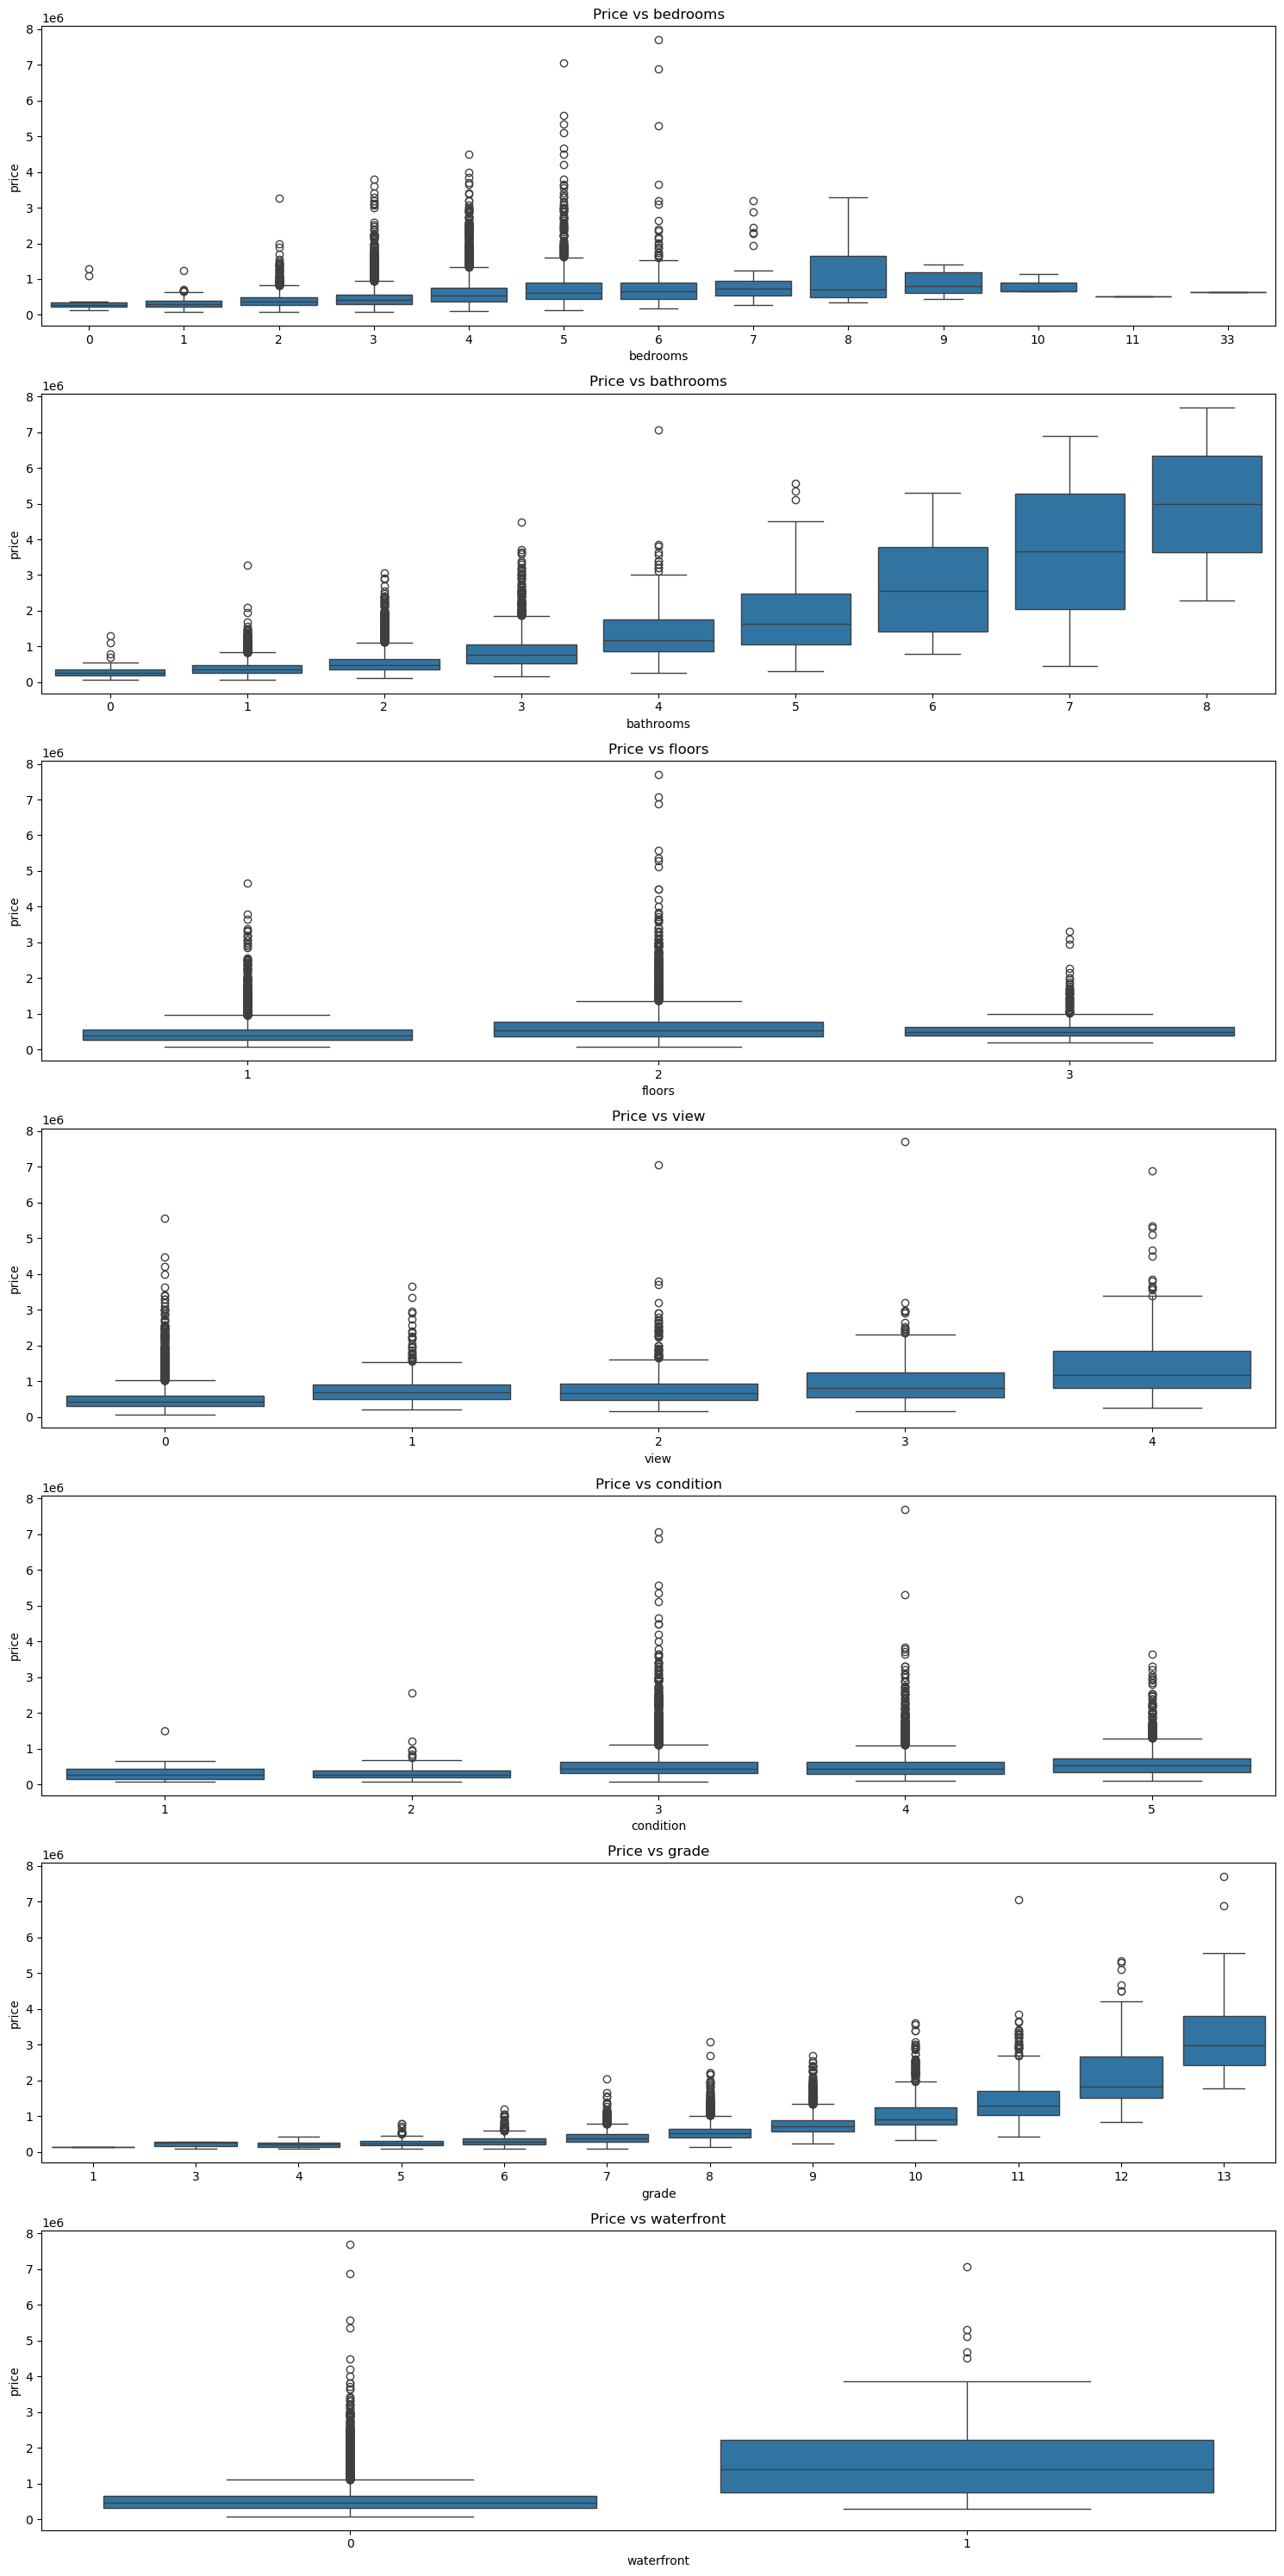

In [21]:
# boxplot for the price and the number of bedrooms, bathrooms, floors, view, condition, grade
plt.figure(figsize=(15,30))
plt.subplot(7,1,1)
sns.boxplot(data=df_housesales, x='bedrooms', y='price')
plt.title('Price vs bedrooms')

plt.subplot(7,1,2)
sns.boxplot(data=df_housesales, x='bathrooms', y='price')
plt.title('Price vs bathrooms')

plt.subplot(7,1,3)
sns.boxplot(data=df_housesales, x='floors', y='price')
plt.title('Price vs floors')

plt.subplot(7,1,4)
sns.boxplot(data=df_housesales, x='view', y='price')
plt.title('Price vs view')

plt.subplot(7,1,5)
sns.boxplot(data=df_housesales, x='condition', y='price')
plt.title('Price vs condition')

plt.subplot(7,1,6)
sns.boxplot(data=df_housesales, x='grade', y='price')
plt.title('Price vs grade')

plt.subplot(7,1,7)
sns.boxplot(data=df_housesales, x='waterfront', y='price')
plt.title('Price vs waterfront')


plt.tight_layout()

### 7. Checking the outliers

In [22]:
# First, define a function to identify outliers in numerical columns according to the IQR
def find_column_outliers_IQR(df_housesales, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df_housesales[column].quantile(0.25)
    Q3 = df_housesales[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df_housesales[(df_housesales[column] < lower_bound) | (df_housesales[column] > upper_bound)].index
    
    return df_housesales.loc[outlier_indices]

In [23]:
# Check for outliers in price
price_outliers = find_column_outliers_IQR(df_housesales, 'price')
price_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,1225000.0,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2000000.0,3,2,3050,44867,1,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,1350000.0,3,2,2753,65005,1,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1325000.0,5,2,3200,20158,1,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,1450000.0,4,2,2750,17789,1,0,0,3,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,1700000.0,4,3,3830,8963,2,0,0,3,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,3567000.0,5,4,4850,10584,2,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,1222500.0,4,3,4910,9444,1,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,1575000.0,4,3,3410,10125,2,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


#### A significant number of outliers are identified. However, the values appear reasonable in context and should be retained in the dataframe

### 8. Exporting the Data

In [24]:
df_housesales_clean = df_housesales

In [26]:
df_housesales_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Cleaned_Housesales_in_KingCounty_USA.csv'))

## END